In [31]:
import pandas as pd
from matplotlib import pyplot

dataset = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col="id")

print("Size of raw dataset\n", dataset.shape)
print("5 first rows of raw dataset\n", dataset.head(5))
print("Summary of raw dataset\n", dataset.describe(include='all'))

Size of raw dataset
 (5110, 11)
5 first rows of raw dataset
        gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0             0              1          Yes        Private   
51676  Female  61.0             0              0          Yes  Self-employed   
31112    Male  80.0             0              1          Yes        Private   
60182  Female  49.0             0              0          Yes        Private   
1665   Female  79.0             1              0          Yes  Self-employed   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
id                                                                      
9046           Urban             228.69  36.6  formerly smoked       1  
51676          Rural             202.21   NaN     never smoked       1  
31112          Rural             105.92  32.5     never smoked       1  
60182        

# Data Cleaning

## Identify Columns That Have Very Few Values

In [33]:
# number of unique values in each column
n_uniques = dataset.nunique()

In [38]:
# report the column and the number of unique values for each column
print(dataset.shape)
print("{:<20}{:>10}{:>15}".format("Feature", "n_unique", "percentage"))
for col in dataset.columns:
    percentage = n_uniques[col] / dataset.shape[0] * 100
    print("{:<20}{:>10}{:>15.1f}%".format(col, n_uniques[col], percentage))

(5110, 11)
Feature               n_unique     percentage
gender                       3            0.1%
age                        104            2.0%
hypertension                 2            0.0%
heart_disease                2            0.0%
ever_married                 2            0.0%
work_type                    5            0.1%
Residence_type               2            0.0%
avg_glucose_level         3979           77.9%
bmi                        418            8.2%
smoking_status               4            0.1%
stroke                       2            0.0%


In [29]:
# report the columns that has less than 1% number of unique values and these unique values
for col in dataset.columns:
    percentage = n_uniques[col]/dataset.shape[0] * 100
    if percentage < 1:
        print("{:<20}{}".format(col, dataset[col].unique()))

gender              ['Male' 'Female' 'Other']
hypertension        [0 1]
heart_disease       [1 0]
ever_married        ['Yes' 'No']
work_type           ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type      ['Urban' 'Rural']
smoking_status      ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke              [1 0]


## Remove Rows That Contain Duplicate Data

In [24]:
print(dataset.shape)
# calculate duplicates
dups = dataset.duplicated()
# report if there are any duplicated
print("Duplicate rows? >>>", dups.any())
# list all duplicate rows
print(dataset[dups])
# drop_duplicate rows (if any)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(5110, 11)
Duplicate rows? >>> False
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []
(5110, 11)


## Outliers Detection

In [30]:
# determine categorical and numerical features by percentage of unique values
categorical_ix = []
numerical_ix = []
for col in dataset.columns:
    percentage = n_uniques[col]/dataset.shape[0] * 100
    if percentage < 1:
        categorical_ix.append(col)
    else:
        numerical_ix.append(col)
print("Categorical features detected:", categorical_ix)
print("Numerical features detected:", numerical_ix)

Categorical features detected: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
Numerical features detected: ['age', 'avg_glucose_level', 'bmi']


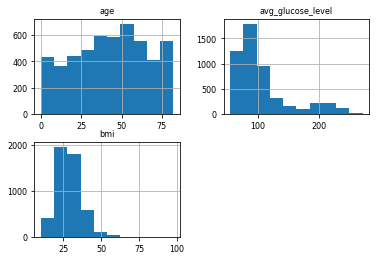

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [40]:
# box plot
fig = dataset[numerical_ix].hist(xlabelsize=8, ylabelsize=8)
[x.title.set_size(8) for x in fig.ravel()]
pyplot.show()

# summarize
dataset[numerical_ix].describe()

By looking at the table and by research domain specific knowledge, we infer:

* *age* feature has outliers, where min value should be greater than 0.08
* *bmi* feature has outliers, where max value should not be far greater than 35

## Remove Outlier with Domain Specific Knowledge



### Remove Outlier With Standard Deviation


### Remove Outlier With Quantile Range


### Remove Outliers With Local Outlier Factor